---
title: "A World With No Per Capita Minimum Grant"
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

- The model here applies a hypothetical per capita minimum grant constraint, set at 0%, to ensure that each jurisdiction receives at least this proportion of the funds if they were allocated on a per capita basis. 

- The per capita minimum for the benchmark scenario is set to 30%, as is the status quo.

In [1]:
import pandas as pd
from fagrants_module import fagrants
import seaborn as sns
import matplotlib.pyplot as plt

inst = fagrants.fagrants_model(
    data_path="./Data/FA Grants Tables - Python.xlsx",
    per_capita_minimum=0,  # Set to 20% for this simulation
    per_capita_minimum_base=0.3,
)
sim_grants = inst.run()
sim_grants["Sim_i"] = sim_grants["UID"].str.split("_").str[1].astype(int)
for year in range(2025, 2029):
    sim_grants[f"Grant Delta_{year}"] = (
        sim_grants[f"Grant_{year}"] - sim_grants[f"Grant_base_{year}"]
    )

# sim_grants_udl = sim_grants[sim_grants["ACLG"] == "UDL"].copy()
def weighted_group_delta(grouped_df):
    return_dict = {}

    for year in range(2025, 2029):
        total_weight = grouped_df[f"ERP_{year}"].sum()

        return_dict[f"Population_{year}"] = total_weight

        weighted_mean = (
            grouped_df[f"Grant Delta_{year}"] * grouped_df[f"ERP_{year}"]
        ).sum() / total_weight

        return_dict[f"Grant Delta_{year}"] = weighted_mean

    return pd.Series(return_dict)

sim_grants_grouped = (
    sim_grants.groupby(["Jurisdiction", "ACLG", "Sim_i"])
    .apply(weighted_group_delta, include_groups=False)
    .reset_index()
)

sim_grants_melted = pd.melt(
    sim_grants_grouped,
    id_vars=["Jurisdiction", "ACLG", "Sim_i"],
    value_vars=[f"Grant Delta_{year}" for year in range(2025, 2029)],
    var_name="Year",
    value_name="Expected Change in GPG ($)",
)

sim_grants_melted["Year"] = sim_grants_melted["Year"].str.split("_").str[1].astype(int)
sim_grants_melted["State-ACLG"] = (
    sim_grants_melted["Jurisdiction"] + " - " + sim_grants_melted["ACLG"]
)

In [2]:
def grants_plot(sub_df):
    g = sns.FacetGrid(
        sub_df,
        col="State-ACLG",
        #x="Year",
        #y="Expected Change in GPG ($)",
        # kind="line",
        col_wrap=2,
        # legend="auto",
        sharex=False,
        sharey=False,
        aspect=(1 + 5**0.5) / 2,
        despine=True,
        height=4,
    )

    # g.map_dataframe(sns.lineplot,
    #     x="Year",
    #     y="Expected Change in GPG ($)",
    #     hue="ACLG",
    #     units="Sim_i",
    #     dashes=False,
    #     legend=False,
    #     alpha=0.1,
    #     color="0.3",
    #     estimator=None,
    # )

    g.map_dataframe(
         sns.lineplot,
         x="Year",
         y="Expected Change in GPG ($)",
         errorbar="ci",
         marker="o",
         dashes=False,
         legend=False,
         zorder=5,
         err_style="band",
         color="#062E4A"
     )

    for ax in g.axes.flat:
        state_aclg = ax.get_title()
        ax.text(0.9, 1, state_aclg.split(" - ")[-1], transform=ax.transAxes, fontweight="bold")
        ax.set_title("")
        ax.set_xticks([2025, 2026, 2027, 2028])
        ax.set_xticklabels(["2025-26", "2026-27", "2027-28", "2028-29"])

    return g

## New South Wales

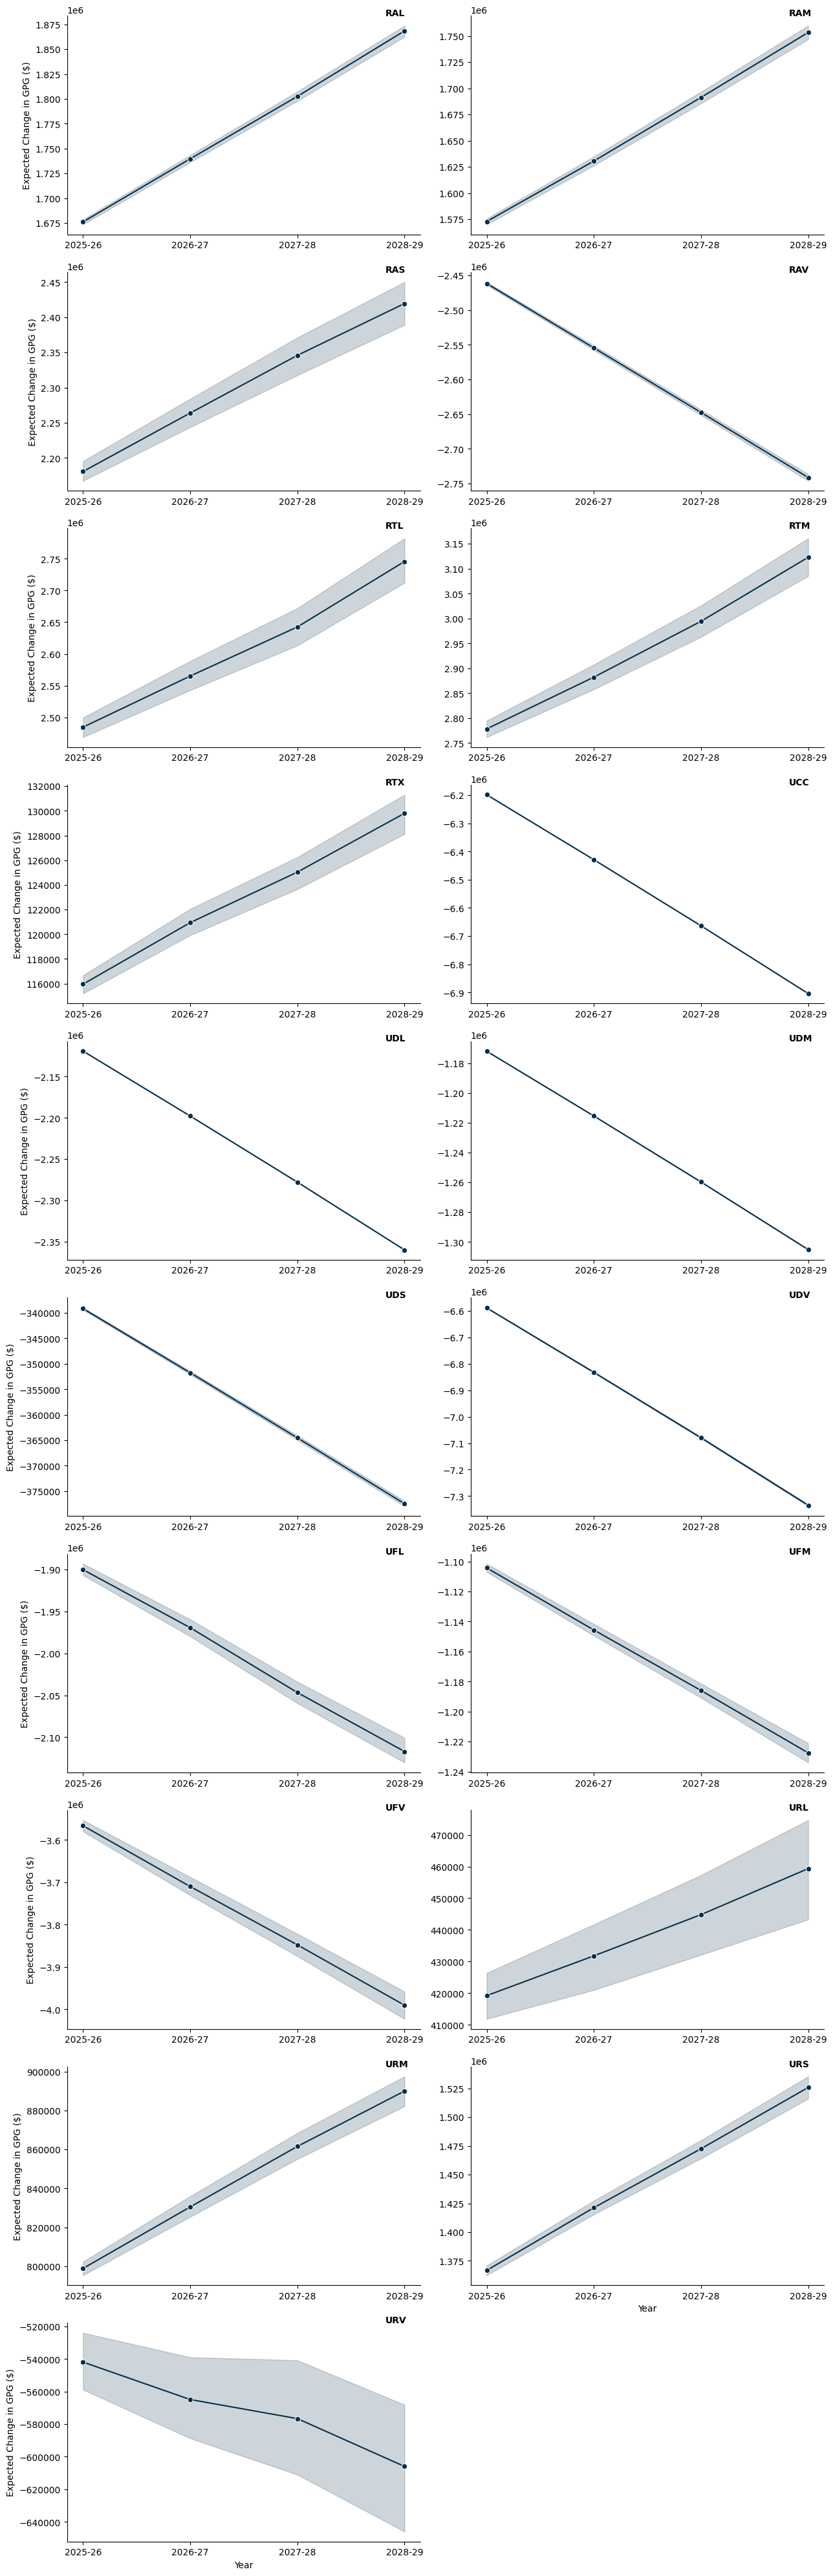

In [3]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "New South Wales"])

## Victoria

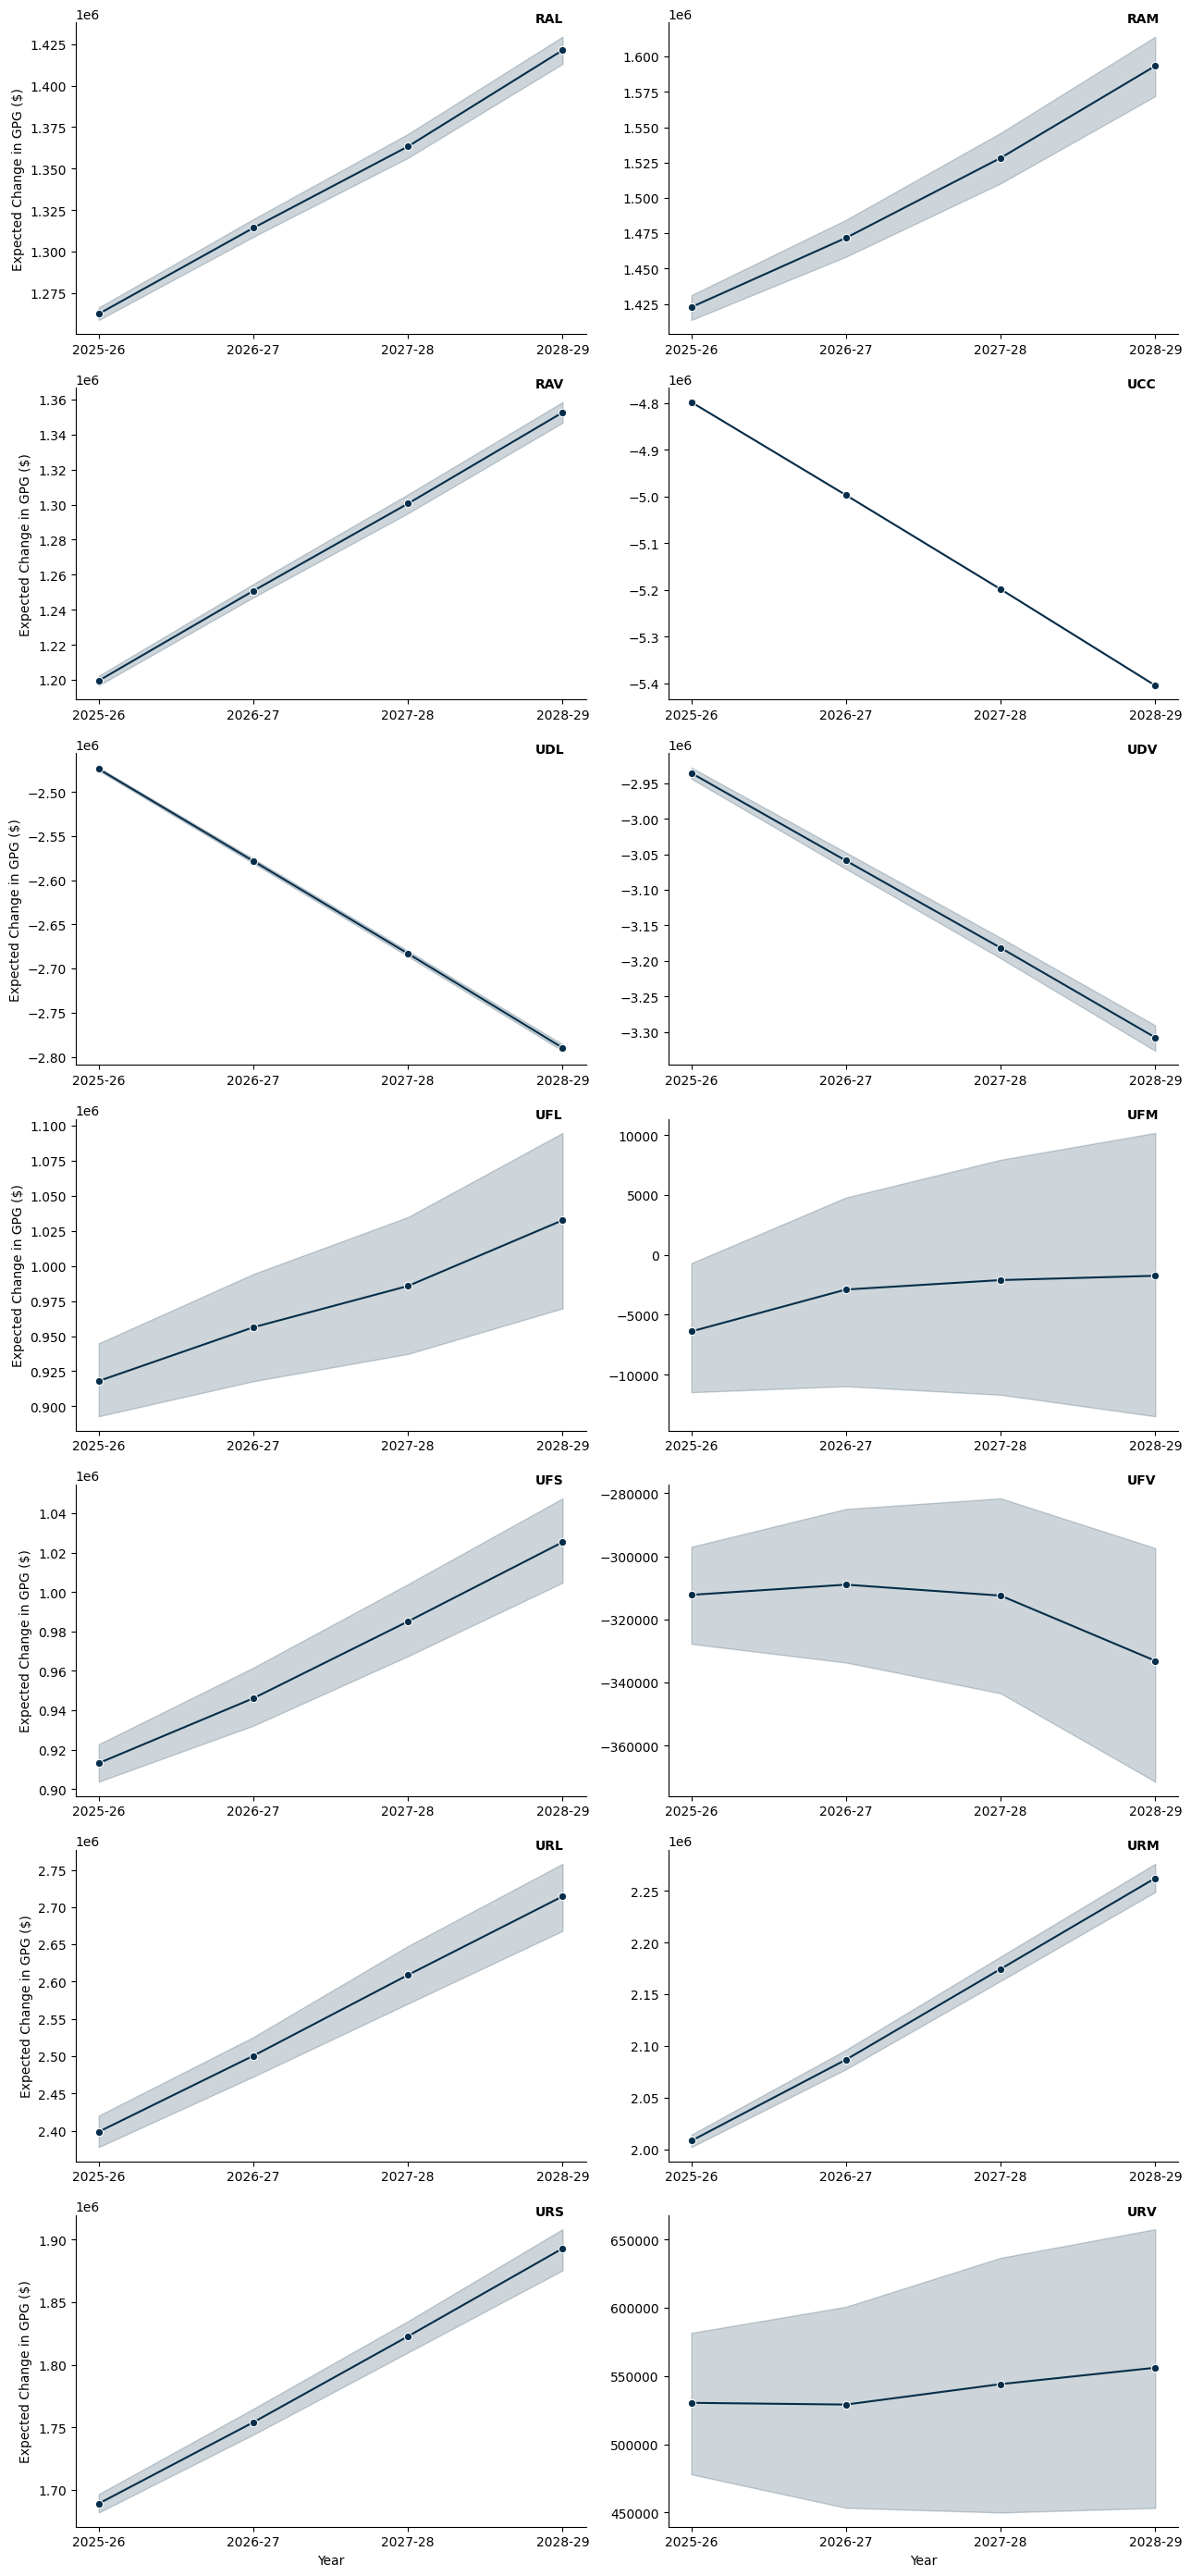

In [4]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Victoria"])

## Queensland

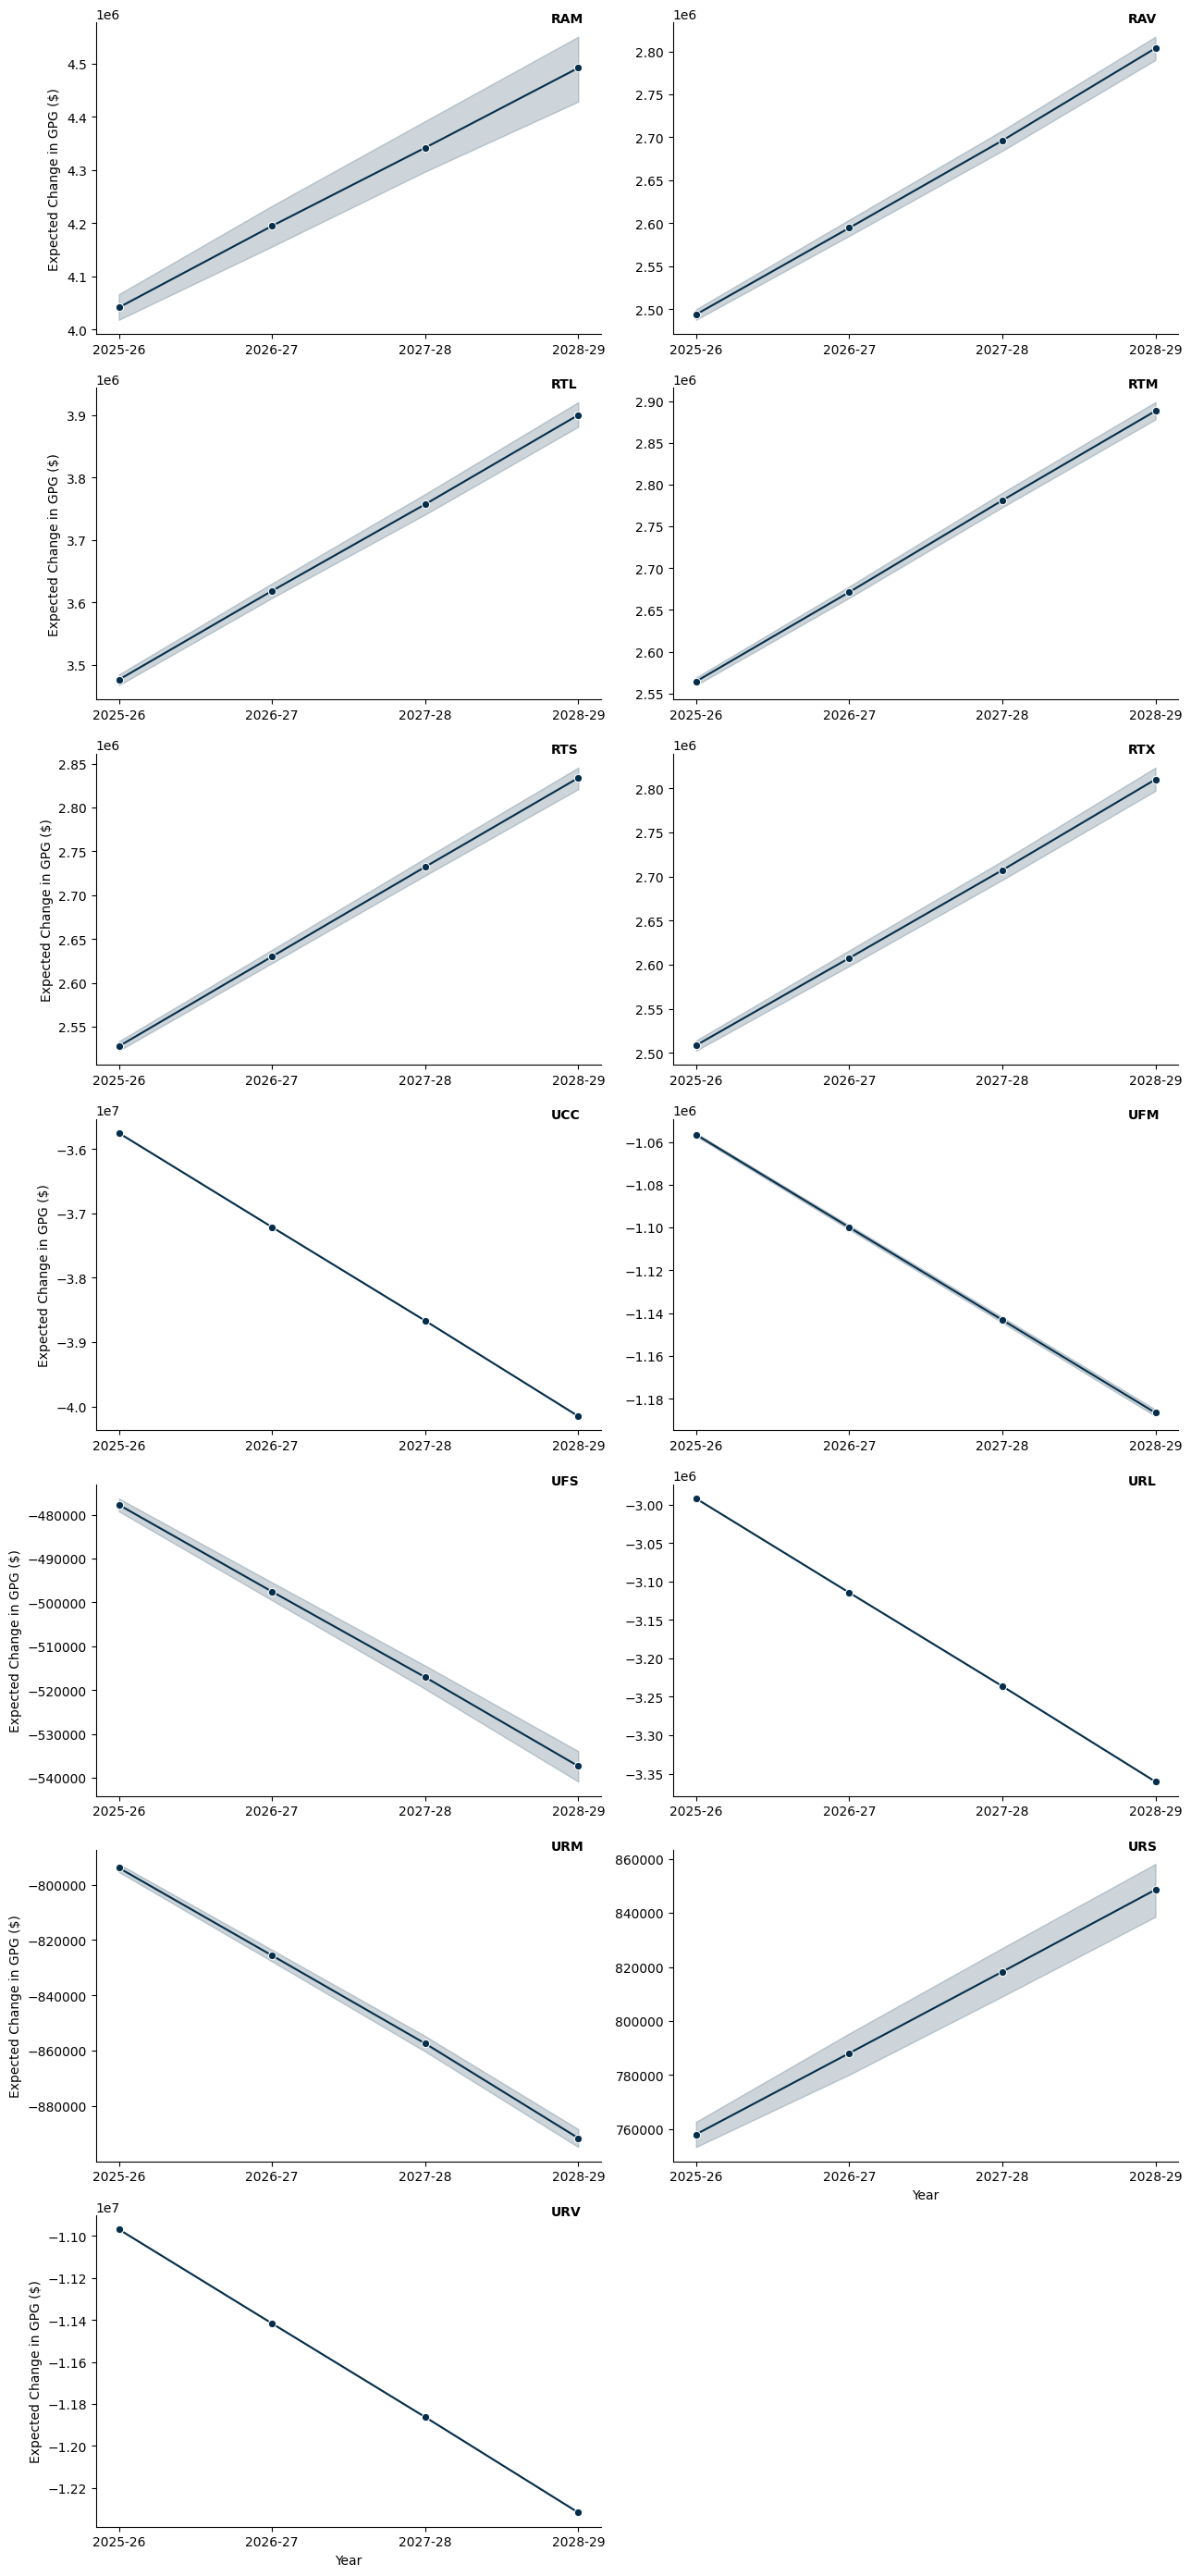

In [5]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Queensland"])

## South Austrlalia

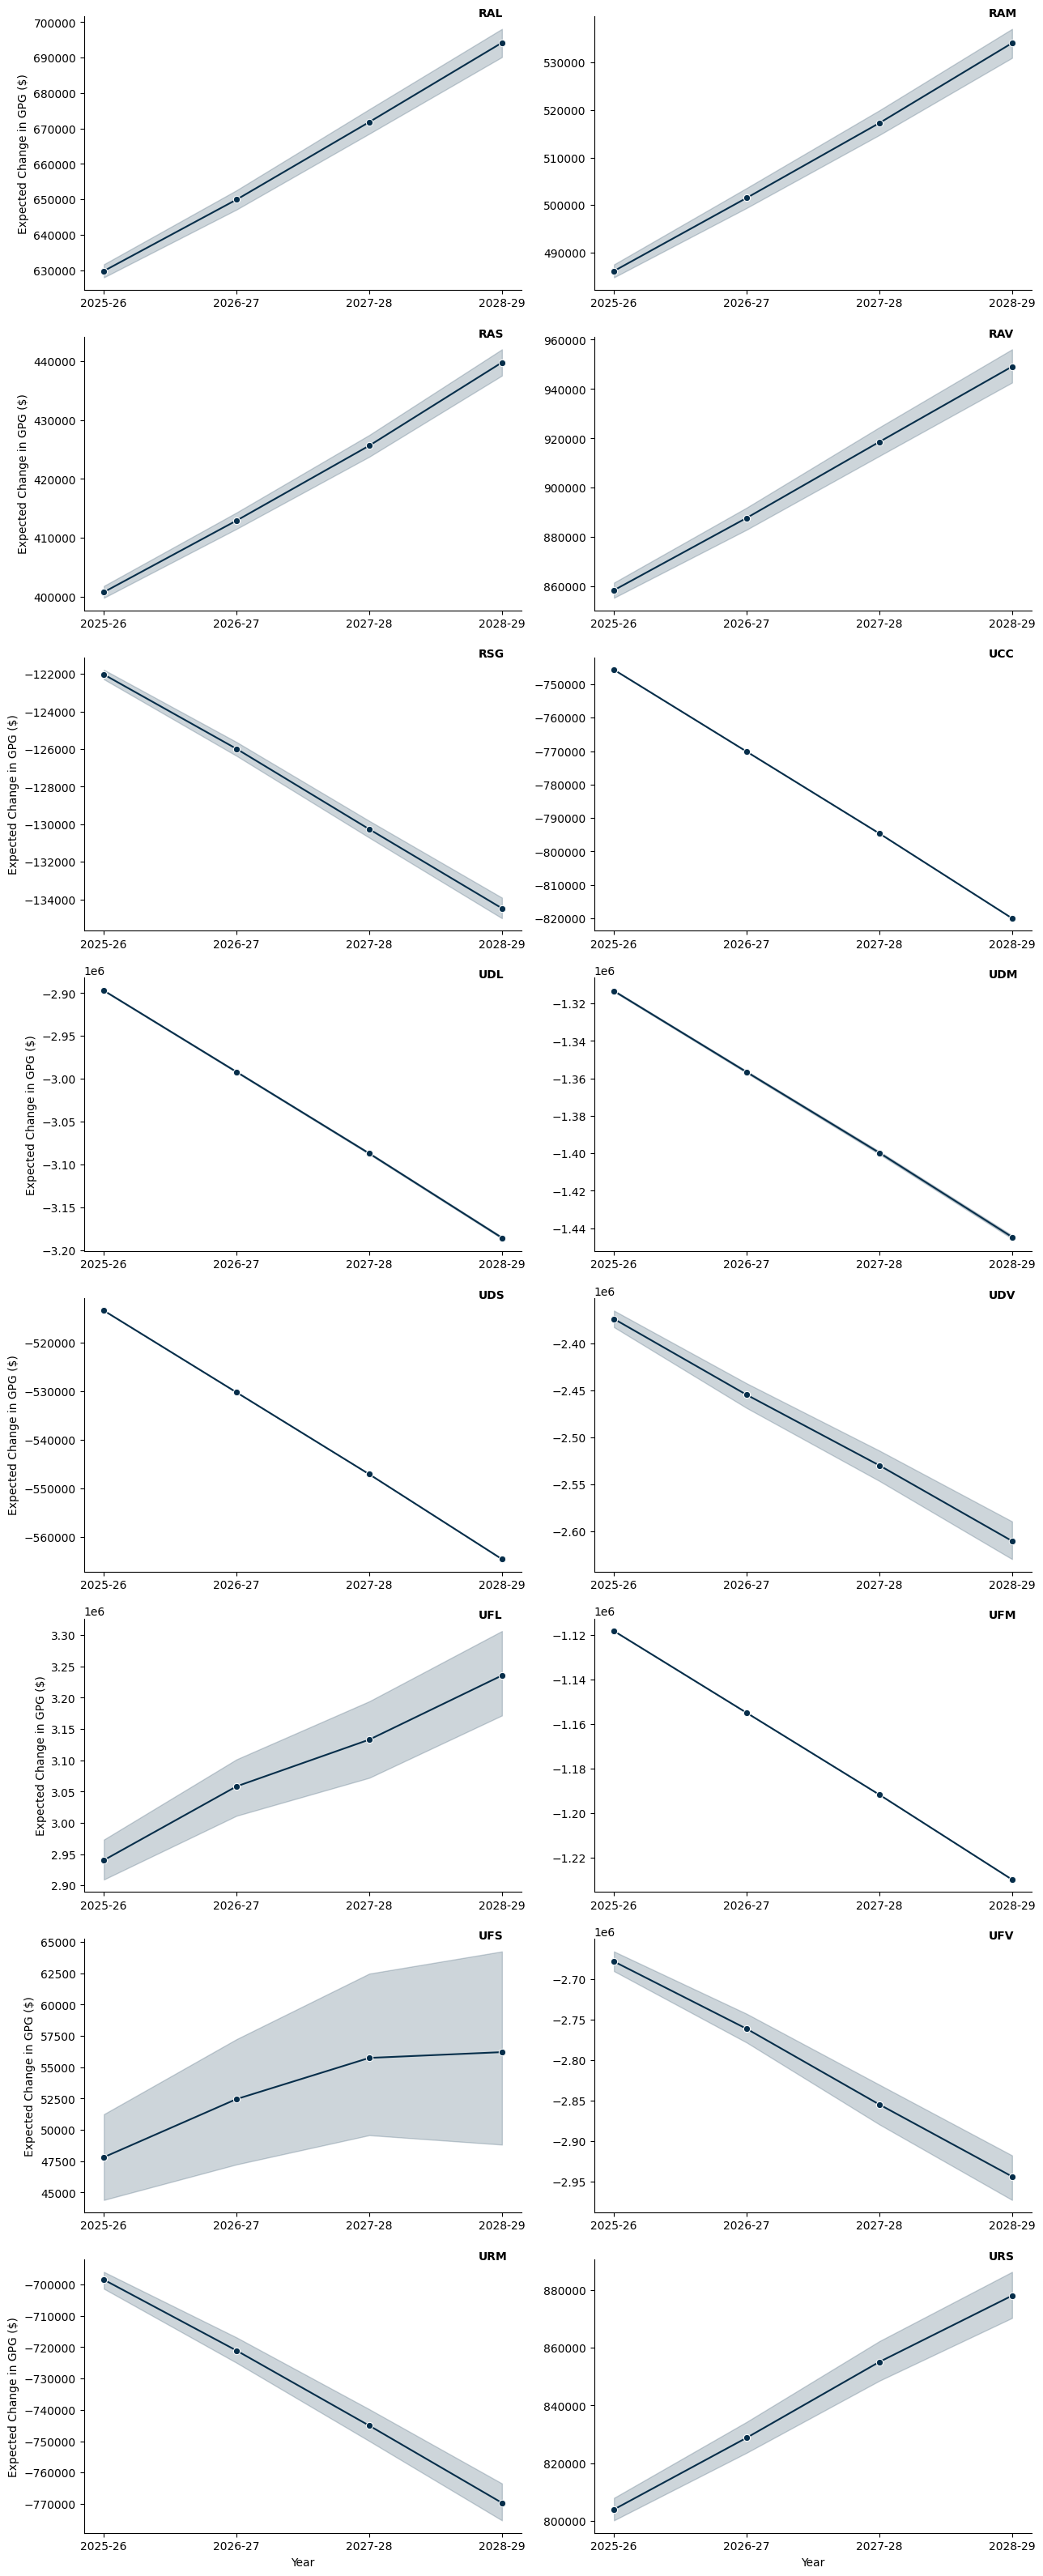

In [6]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "South Australia"])

## Western Australia

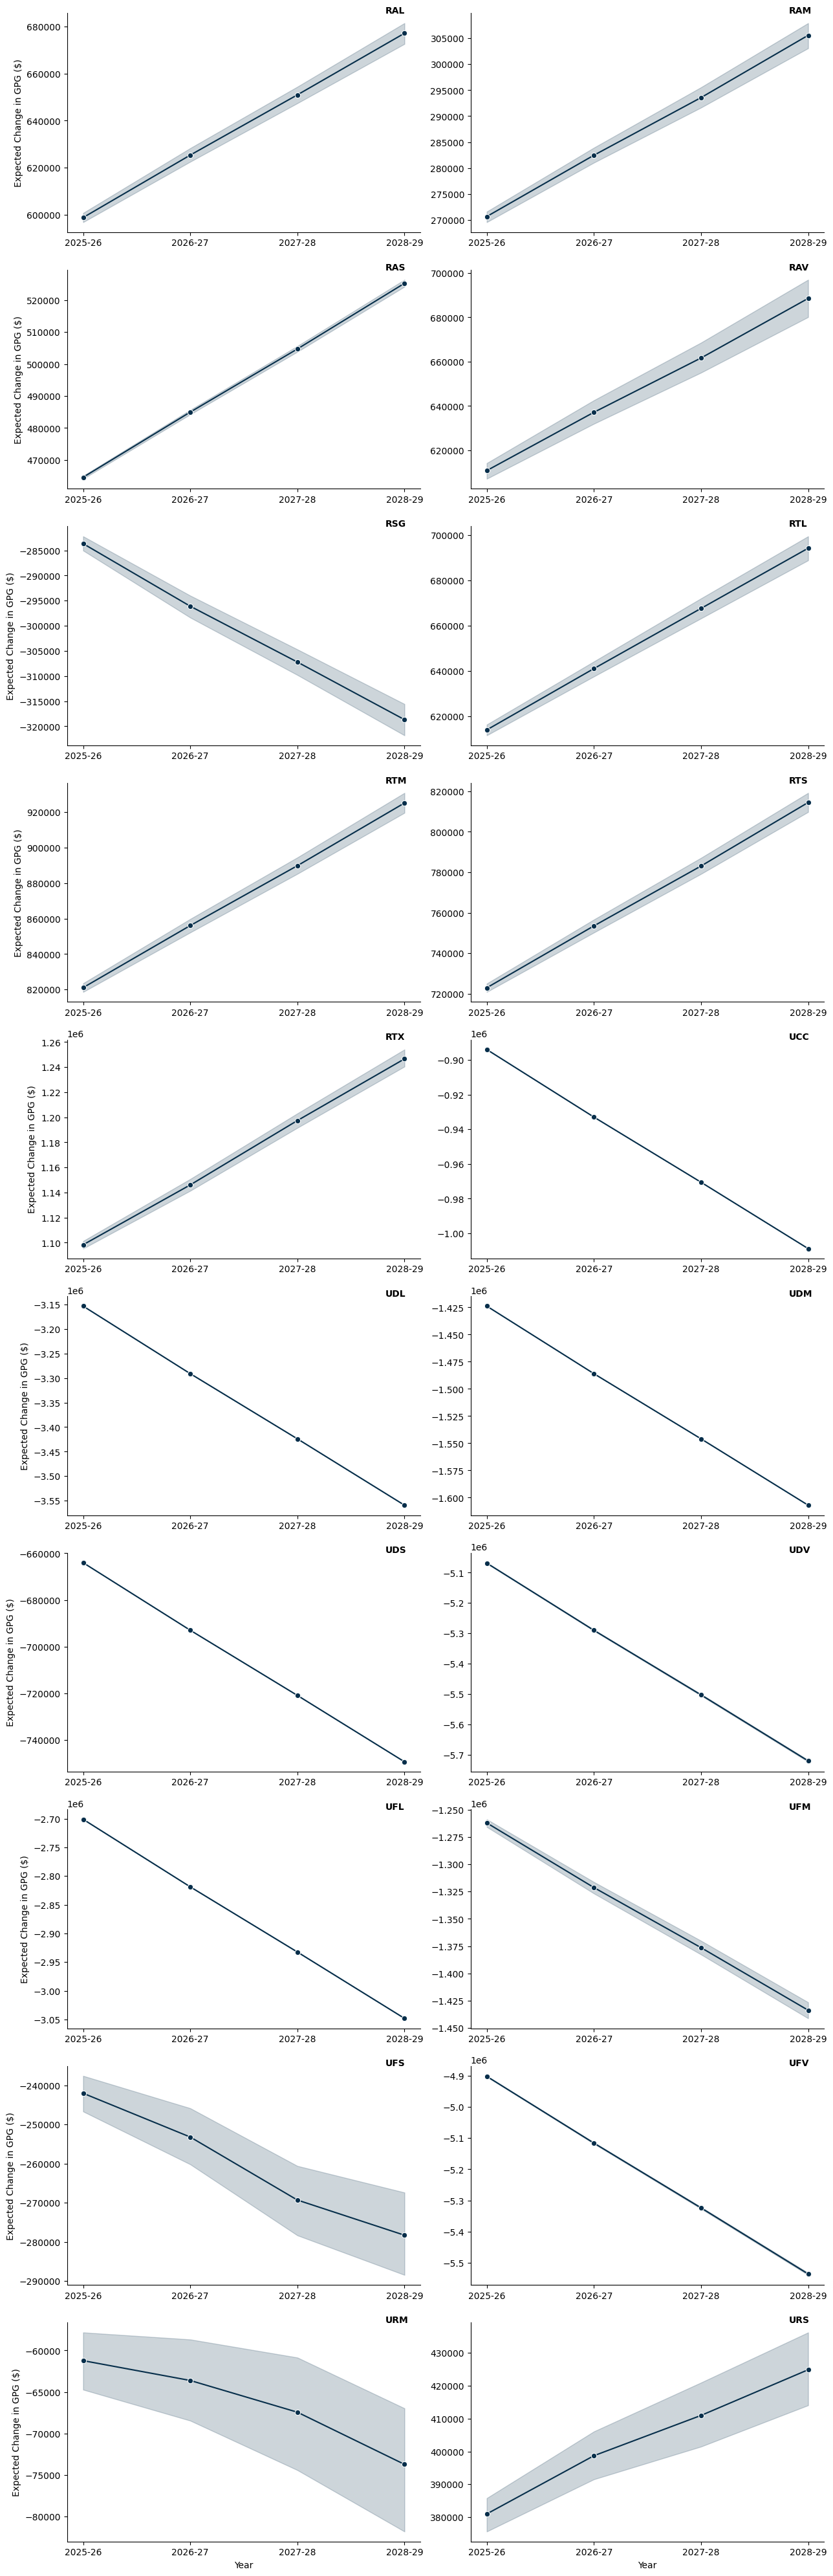

In [7]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Western Australia"])

## Tasmania

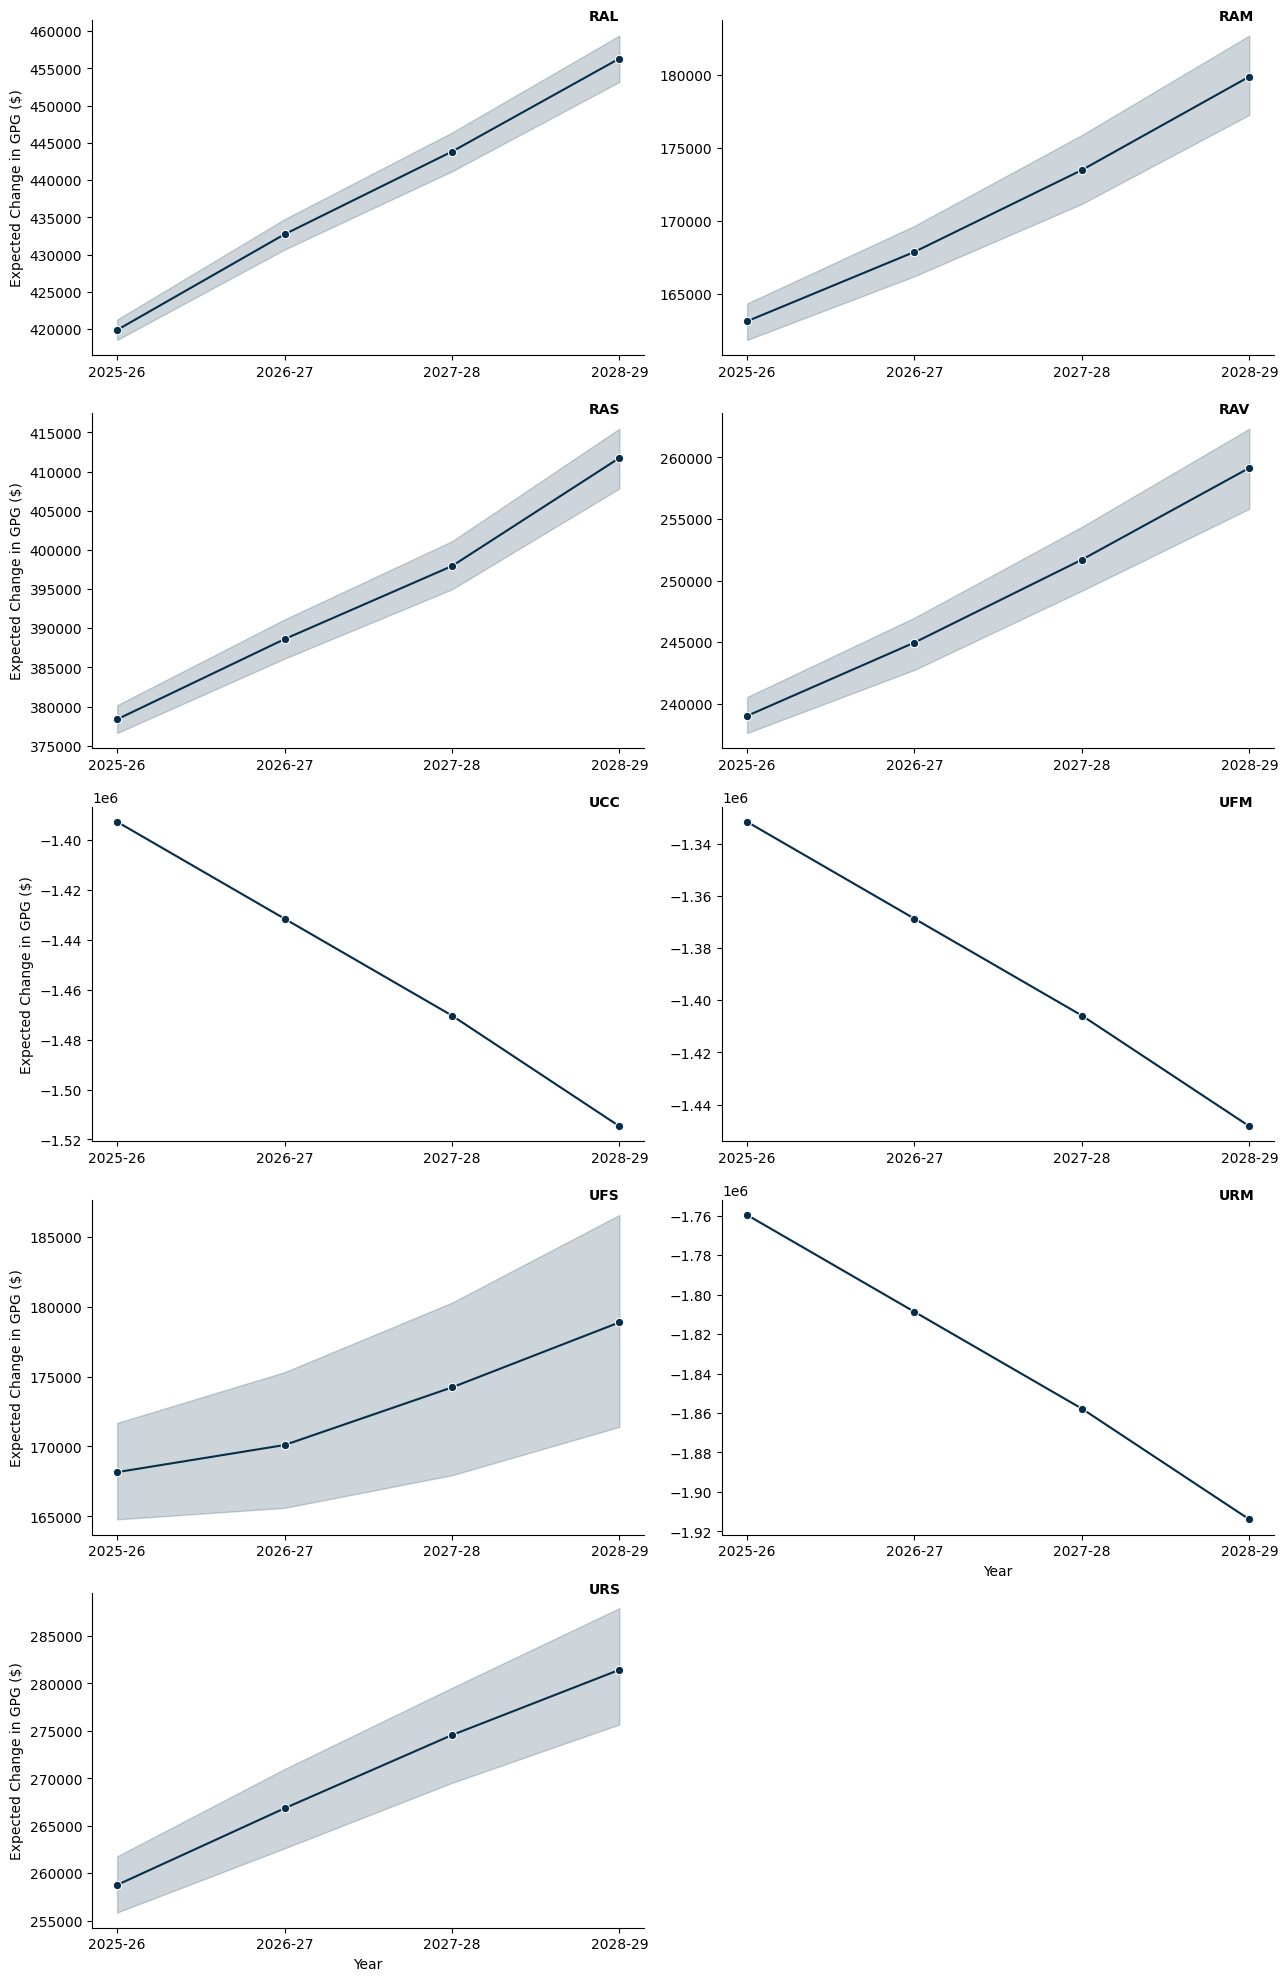

In [8]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Tasmania"])

## Northern Territory

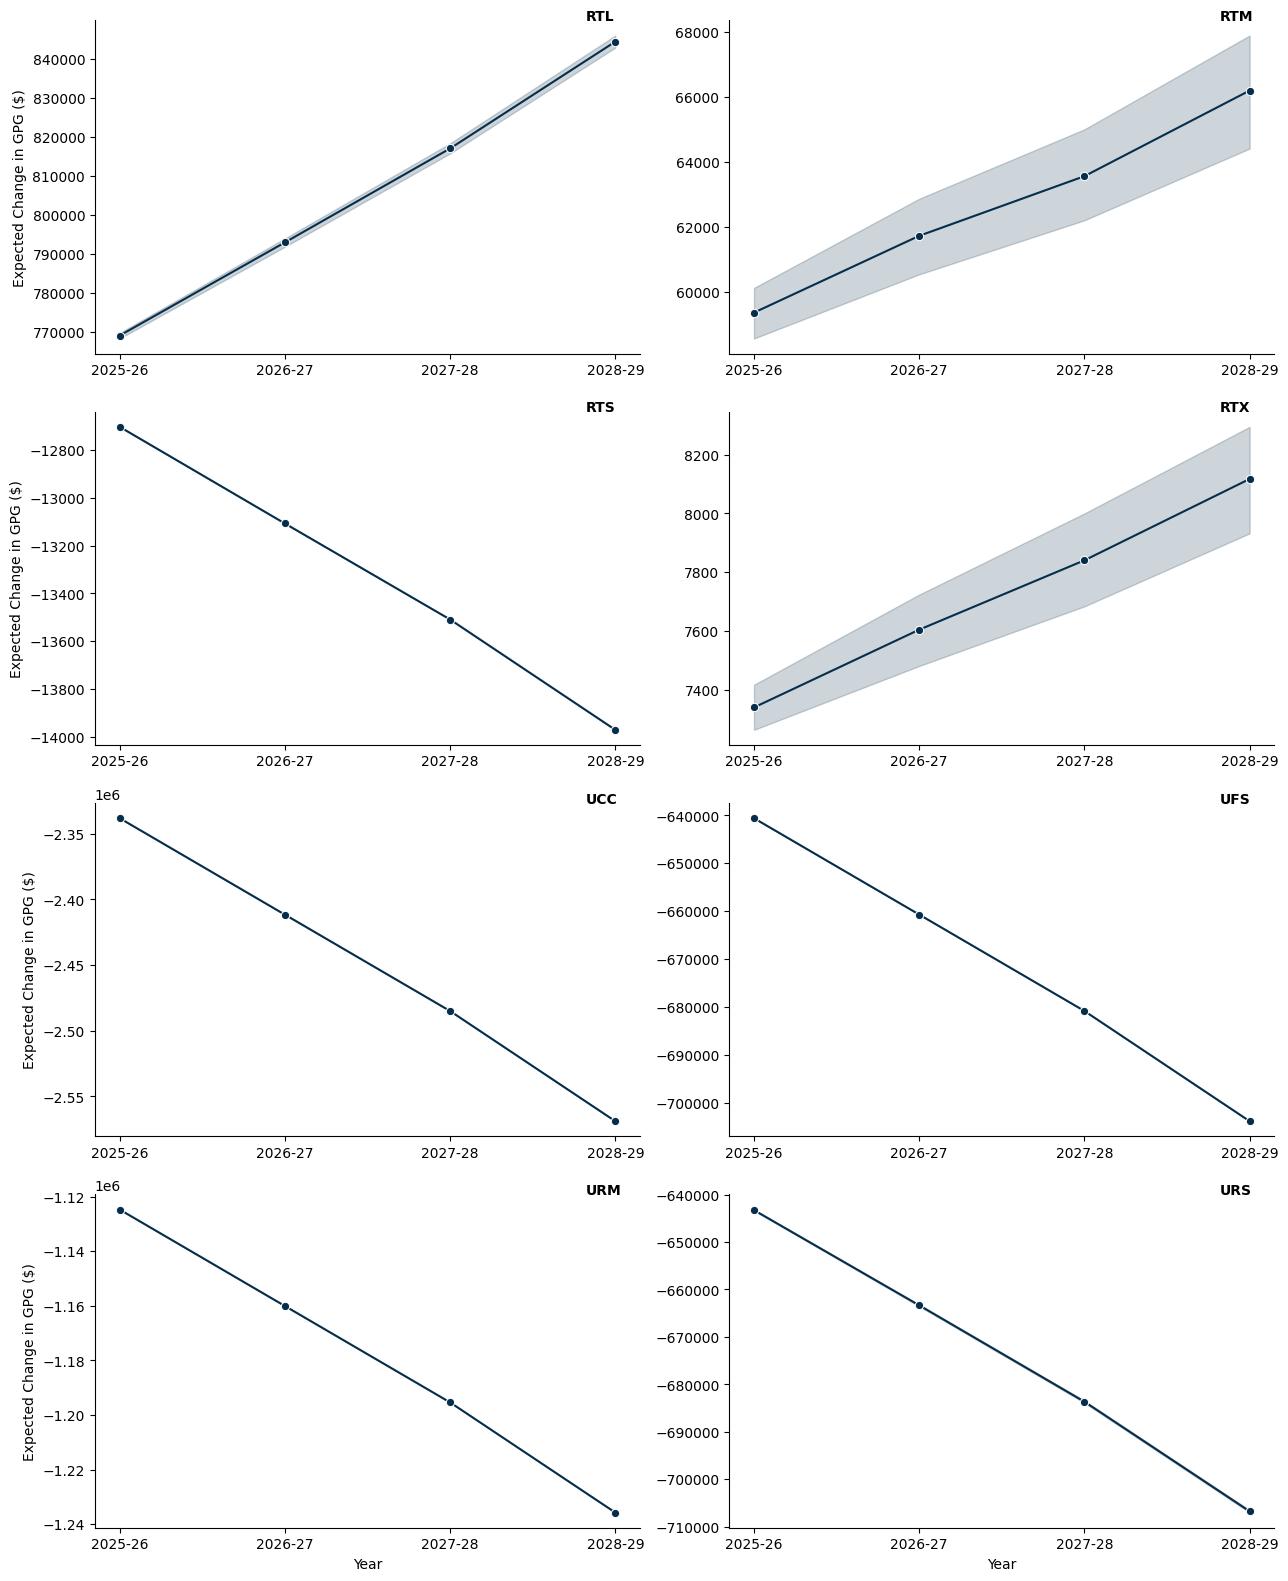

In [9]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Northern Territory"])